In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('ncharged')
    scalar.append('nneutral')
    scalar.append('nnh')
    scalar.append('nch')
    scalar.append('pt_jet')
    scalar.append('p_jet')
    scalar.append('eta_jet')
    scalar.append('pt_electron')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('x')
    scalar.append('y')
    scalar.append('xsec')
    scalar.append('ntrials')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print 'Processed', inputFilename, 'in',  end-start, 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
files=['$HOME/EIC/output/116.root']
a = getData(files)

Processed $HOME/EIC/output/116.root in 71.2040350437 seconds


In [4]:
b = applyCut(a, '0.1 < y < 0.85', '0.1 < y < 0.85')
b = applyCut(b, 'W2 > 4', 'W2 > 4')
b.eval('mult = nneutral + ncharged', inplace=True)

0.1 < y < 0.85 6783540  fraction kept: 18.7
W2 > 4 6783540  fraction kept: 100.0


In [5]:
etaedges = [-4.5, 4.5]
ptedges = toArrayFloat(0, 1.55, 0, log=True, logNum=13)
d = partitionEtaPt(b, etaedges, ptedges)


-4.5 < eta_jet < 4.5 

-4.5 < eta_jet < 4.5 6783540  fraction kept: 100.0
1.0 < pt_jet < 1.3463769461724673 585922  fraction kept: 8.6
1.3463769461724673 < pt_jet < 1.812730881184699 413156  fraction kept: 6.1
1.812730881184699 < pt_jet < 2.440619068041981 320441  fraction kept: 4.7
2.440619068041981 < pt_jet < 3.285993247600655 251405  fraction kept: 3.7
3.285993247600655 < pt_jet < 4.424185553847917 172699  fraction kept: 2.5
4.424185553847917 < pt_jet < 5.956621435290106 104289  fraction kept: 1.5
5.956621435290106 < pt_jet < 8.019857777551351 57693  fraction kept: 0.9
8.019857777551351 < pt_jet < 10.7977516232771 28637  fraction kept: 0.4
10.7977516232771 < pt_jet < 14.537843856076622 12820  fraction kept: 0.2
14.537843856076622 < pt_jet < 19.573417814876606 4907  fraction kept: 0.1
19.573417814876606 < pt_jet < 26.353198503751333 1293  fraction kept: 0.0
26.353198503751333 < pt_jet < 35.48133892335755 147  fraction kept: 0.0


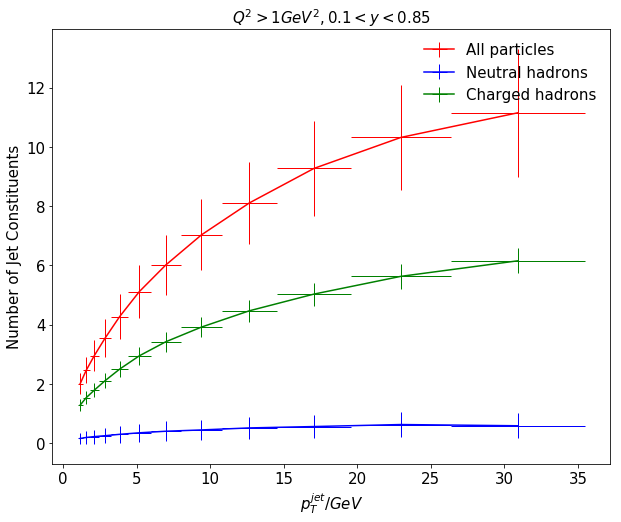

In [6]:
fig = plt.figure(figsize=(10,8))
for i in range(len(etaedges)-1):
    x = []*(len(ptedges)-1)
    y = []*(len(ptedges)-1)
    ynh = []*(len(ptedges)-1)
    ych = []*(len(ptedges)-1)
    yerr = []*(len(ptedges)-1)
    ynherr = []*(len(ptedges)-1)
    ycherr = []*(len(ptedges)-1)
    for j in range(len(ptedges)-1):
        df = d[i][j]
        x.append((((float)(ptedges[j])) + ptedges[j+1])/2)
        y.append(np.mean(df['mult']))
        ynh.append(np.mean(df['nnh']))
        ych.append(np.mean(df['nch']))
        xerr = getInterval(ptedges)/2
        yerr.append(np.std(df['mult'])/2)
        ynherr.append(np.std(df['nnh']/2))
        ycherr.append(np.std(df['nnh']/2))
    plt.errorbar(x, y, xerr = xerr, yerr = yerr, color='r', elinewidth=1, label='All particles')
    plt.errorbar(x, ynh, xerr = xerr, yerr = ynherr, color='b', elinewidth=1, label='Neutral hadrons')
    plt.errorbar(x, ych, xerr = xerr, yerr = ycherr, color='g', elinewidth=1, label='Charged hadrons')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$p_T^{jet} / GeV$', fontsize=15)
plt.ylabel('Number of Jet Constituents', fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.title('$ Q^2 > 1 GeV^2, 0.1 < y < 0.85 $', fontsize=15)
plt.savefig('images/neutral.pdf', bbox_inches='tight')